<a href="https://colab.research.google.com/github/MadeehaTassadaq/MadeehaTassadaq/blob/main/cat_v_dog_classificatio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [36]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:29<00:00, 32.4MB/s]
100% 1.06G/1.06G [00:29<00:00, 38.7MB/s]


In [6]:
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [37]:
import zipfile
# Unzip the file
zip_ref =  zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


In [38]:
# generators
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',

    batch_size=32,
    image_size=(256, 256))

test_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',

    batch_size=32,
    image_size=(256, 256))

Found 20557 files belonging to 2 classes.
Found 5140 files belonging to 2 classes.


In [40]:
# normalize the data
train_ds = train_ds.map(lambda x, y: (x/255, y))
test_ds = test_ds.map(lambda x, y: (x/255, y))

In [41]:
# build a convulation model
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
model.add(BatchNormalization())


model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
model.add(BatchNormalization())



model.add(Flatten())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# build a ANN model
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 127, 127, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 62, 62, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,850,241 (56.65 MB)

 Trainable params: 14,849,793 (56.65 MB)

 Non-trainable params: 448 (1.75 KB)

In [45]:
# complile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
# early stopping

from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [46]:
# model the model
history=model.fit(train_ds, epochs=10, validation_data=test_ds, callbacks=[early_stopping])

Epoch 1/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 65s 89ms/step - accuracy: 0.5466 - loss: 1.9795 - val_accuracy: 0.6064 - val_loss: 0.6412
Epoch 2/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 74s 82ms/step - accuracy: 0.6618 - loss: 0.6182 - val_accuracy: 0.7189 - val_loss: 0.5493
Epoch 3/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 53s 82ms/step - accuracy: 0.7384 - loss: 0.5355 - val_accuracy: 0.7374 - val_loss: 0.5533
Epoch 4/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 84s 85ms/step - accuracy: 0.7860 - loss: 0.4564 - val_accuracy: 0.7434 - val_loss: 0.6088
Epoch 5/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 52s 81ms/step - accuracy: 0.8275 - loss: 0.3960 - val_accuracy: 0.7800 - val_loss: 0.5082
Epoch 6/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 55s 85ms/step - accuracy: 0.8578 - loss: 0.3255 - val_accuracy: 0.8195 - val_loss: 0.4291
Epoch 7/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.9000 - loss: 0.2428 - val_accuracy: 0.7885 - val_loss: 0.5459
Epoch 8/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 94s 106ms/step - accuracy: 0.9370 - loss: 0.1607 -

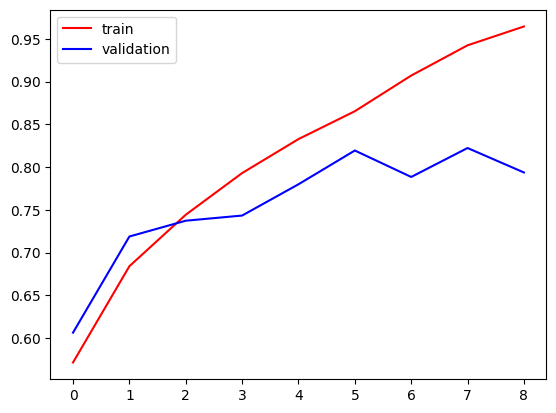

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

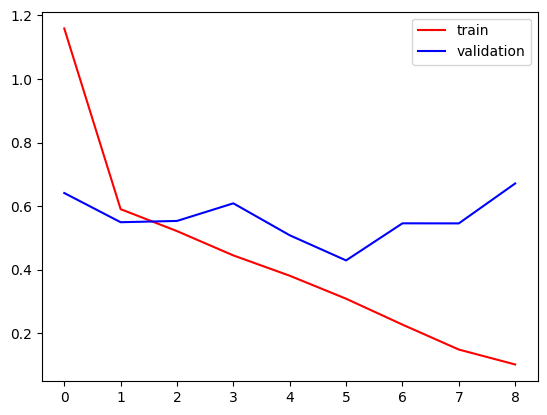

In [54]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

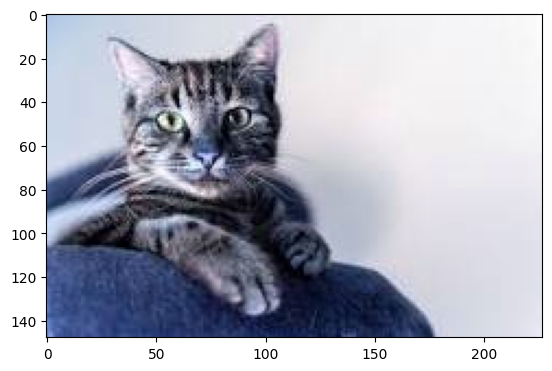

In [74]:
# check the results of model on an image
import cv2
image_cat=cv2.imread('/content/cat.jpg')
plt.imshow(image_cat)


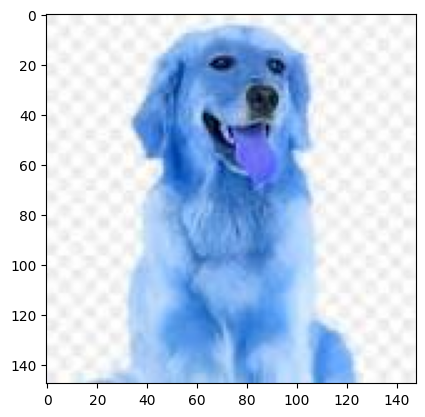

In [75]:
import cv2
image_dog=cv2.imread('/content/dog.jpg')
plt.imshow(image_dog)

In [80]:
image_cat.shape,image_dog.shape

((148, 227, 3), (148, 148, 3))

In [81]:
img_cat=cv2.resize(image_cat, (256,256))

In [82]:
cat_img=img_cat.reshape(1,256,256,3)

In [83]:
model.predict(cat_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[1.]], dtype=float32)